In [31]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym
from sklearn import datasets

In [32]:
def MMC(xi,yi):
    xi = np.array(xi,dtype=float) # conversion np array
    yi = np.array(yi, dtype=float)
    xi= np.hstack(xi) # cambio de dimesion del array
    n = len(xi)
    x_media = np.mean(xi)
    y_media= np.mean(yi)
    x_sumatoria = np.sum(xi)
    y_sumatoria = np.sum(yi)
    #xy_sumatoria = np.sum(xi*yi)
    xy_sumatoria = np.dot(xi,yi)
    x2_sumatoria = np.sum(xi*xi)
    y2_sumatoria = np.sum(yi*yi)
    #print(x_sumatoria,y_sumatoria,xy_sumatoria,x2_sumatoria) # Verificador
    w1=(n*xy_sumatoria-x_sumatoria*y_sumatoria)/(n*x2_sumatoria-x_sumatoria**2)
    #w0= y_media - w1*x_media
    w0=(y_sumatoria-w1*x_sumatoria)/n
    x= sym.Symbol('X')  
    f = w0 + w1*x
    fx = sym.lambdify(x,f)
    fi = fx(xi)
    return fi,f

In [33]:
#n = len(xi)
#x_media = np.mean(xi)
#y_media= np.mean(yi)
#x_sumatoria = np.sum(xi)
#y_sumatoria = np.sum(yi)
#xy_sumatoria = np.sum(xi*yi)
#xy_sumatoria = np.dot(xi,yi)
#x2_sumatoria = np.sum(xi*xi)
#y2_sumatoria = np.sum(yi*yi)
#print(x_sumatoria,y_sumatoria,xy_sumatoria,x2_sumatoria) # Verificador

In [34]:
#w1=(n*xy_sumatoria-x_sumatoria*y_sumatoria)/(n*x2_sumatoria-x_sumatoria**2)
#w0= y_media - w1*x_media
#w0=(y_sumatoria-w1*x_sumatoria)/n
#x= sym.Symbol('X')
#f = w0 + w1*x
#fx = sym.lambdify(x,f)
#fi = fx(xi)
#print ('y media = ',y_media)
#print ('f=',f)
n_puntos = 100
x_i, y_i = datasets.make_regression(n_samples=n_puntos, n_features=1, noise=20)

fi,f = MMC(x_i,y_i)

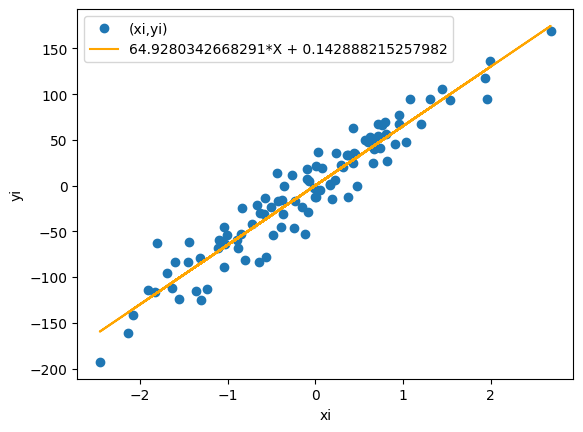

In [35]:
plt.plot(x_i,y_i,'o',label='(xi,yi)')
#plt.stem(xi,yi,bottom=y_media, linefmt = ':')
plt.plot(x_i,fi,color='orange',label=f)
plt.xlabel('xi')
plt.ylabel('yi')
plt.legend()
plt.show()
